In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
from sklearn.tree import plot_tree

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df_answers = pd.read_csv('Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_weather = pd.read_excel('cleaned_weather_data2.xlsx')

In [5]:
#canceling the limitation in order to see all the columns
pd.set_option('display.max_columns', None)

# Making sure the cities correspond in both answers and weather datasets

In [6]:
#Getting the columns with only station names which can also be found in df_answers
answers_columns = df_answers.columns.to_list()
weather_columns = df_weather.columns.to_list()
answer_stations = [col.split('_')[0] for col in answers_columns if '_' in col ]
weather_stations = [col for col in weather_columns if col.split('_')[0] in answer_stations]

In [7]:
df_weather = df_weather[weather_stations]
df_weather

,BASEL_humidity,BASEL_pressure,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,DEBILT_humidity,DEBILT_pressure,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_humidity,KASSEL_pressure,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MADRID_humidity,MADRID_pressure,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,OSLO_humidity,OSLO_pressure,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean
0,0.85,1.0180,0.09,0.7,6.5,0.81,1.0195,0.00,7.0,3.7,0.67,1.017,0.01,2.3,2.4,0.85,1.0032,0.25,0.0,9.3,0.83,1.0161,0.08,0.0,10.0,0.91,1.0010,0.22,0.0,10.6,0.82,1.0094,0.48,1.6,7.9,1.00,1.0173,0.00,0.0,-0.6,0.83,1.0063,0.32,1.0,9.5,0.92,1.0260,0.00,1.4,7.6,0.67,0.10,0.0,6.9,0.98,0.9978,1.14,0.0,4.9,0.73,1.0304,0.010000,2.3,-5.9,1.0114,0.320000,0.0,4.2,0.88,1.0003,0.34,4.7,8.5
1,0.84,1.0180,1.05,1.1,6.1,0.84,1.0172,0.00,0.0,2.9,0.67,1.017,0.31,0.0,2.3,0.90,1.0056,0.06,0.1,7.7,0.89,1.0161,0.66,0.5,8.2,0.98,1.0051,0.23,0.0,6.1,0.86,1.0086,0.27,0.0,7.7,0.94,1.0173,0.13,3.2,2.1,0.92,1.0062,1.34,0.4,8.6,0.86,1.0254,0.00,0.9,9.8,0.72,0.30,5.1,6.2,0.62,1.0139,0.00,0.0,3.4,0.97,1.0292,0.610000,0.0,-9.5,1.0114,0.060000,0.0,4.0,0.91,1.0007,0.84,0.7,8.9
2,0.90,1.0180,0.30,0.0,8.5,0.77,1.0179,0.00,3.5,3.1,0.67,1.017,0.00,0.6,2.7,0.92,1.0165,0.01,3.0,6.8,0.95,1.0161,0.07,0.0,7.1,0.96,1.0166,0.07,0.1,8.4,0.91,1.0129,0.60,0.0,6.5,0.96,1.0173,0.12,0.0,4.6,0.97,1.0167,0.46,0.0,6.9,0.90,1.0287,0.00,2.3,8.6,0.91,0.30,0.0,5.8,0.69,1.0234,0.08,0.0,1.9,0.93,1.0320,0.476219,0.0,-9.5,1.0114,0.020000,0.0,2.4,0.91,1.0096,0.08,0.1,10.5
3,0.92,1.0180,0.00,4.1,6.3,0.93,1.0268,0.00,0.0,2.0,0.67,1.017,0.00,0.0,2.0,0.95,1.0265,0.09,0.0,6.7,0.86,1.0161,0.02,0.0,6.8,0.98,1.0230,0.00,0.0,9.4,0.87,1.0290,0.00,0.0,5.8,0.94,1.0173,0.00,2.2,3.2,0.89,1.0277,0.00,0.3,7.0,0.75,1.0281,0.00,8.7,10.3,0.90,0.01,0.0,3.9,0.98,1.0244,0.35,0.0,3.0,0.93,1.0443,1.100000,0.0,-11.5,1.0114,0.000000,0.0,1.2,0.86,1.0184,0.98,0.0,7.4
4,0.95,1.0180,0.14,5.4,3.0,0.99,1.0286,0.06,0.0,2.0,0.67,1.017,0.00,0.0,2.5,0.90,1.0243,0.39,0.0,8.0,0.92,1.0161,0.62,0.0,7.7,0.84,1.0275,0.00,2.1,8.9,0.86,1.0262,0.71,0.0,5.4,0.94,1.0173,0.00,0.0,3.6,0.92,1.0259,0.56,0.0,8.1,0.64,1.0269,0.00,7.8,12.1,0.85,0.96,5.6,1.8,0.96,1.0092,0.26,0.0,3.7,0.75,1.0430,0.010000,6.1,-9.3,1.0114,0.149542,0.0,3.3,0.80,1.0328,0.00,5.7,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.79,1.0248,0.22,7.7,15.9,0.68,1.0278,0.18,5.7,18.2,0.67,1.017,0.14,5.4,11.7,0.84,1.0190,0.22,2.8,15.7,0.75,1.0214,0.20,6.4,17.8,0.87,1.0140,0.16,1.9,16.4,0.77,1.0161,0.19,4.0,9.1,0.80,1.0289,0.37,5.9,14.7,0.67,1.0201,0.20,5.3,18.6,0.52,1.0204,0.12,5.3,20.0,0.76,0.26,9.7,14.3,0.98,1.0139,0.21,0.1,9.7,0.84,1.0263,0.470000,4.7,0.6,1.0161,0.140000,3.2,11.5,0.82,1.0142,0.41,3.4,10.7
22946,0.77,1.0244,0.22,5.4,16.7,0.68,1.0295,0.18,5.7,15.9,0.67,1.017,0

In [8]:
#dropping DATE column
df_answers = df_answers.drop(columns='DATE')
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# APPLYING DECISION TREE ALGORITHM

In [9]:
#Getting the list of cities
column_names = df_weather.columns.to_numpy()
split_column_names = [name.split('_', 1) for name in column_names]
first_elements = np.array([item[0] if len(item) > 1 else None for item in split_column_names])
cities = list(set(first_elements))
cities

['MUNCHENB',
 'BASEL',
 'OSLO',
 'STOCKHOLM',
 'LJUBLJANA',
 'BUDAPEST',
 'BELGRADE',
 'HEATHROW',
 'DUSSELDORF',
 'MAASTRICHT',
 'DEBILT',
 'SONNBLICK',
 'VALENTIA',
 'KASSEL',
 'MADRID']

# Applying DT model per city.

MUNCHENB - Training Accuracy: 1.00, Testing Accuracy: 0.98
BASEL - Training Accuracy: 1.00, Testing Accuracy: 0.98
OSLO - Training Accuracy: 1.00, Testing Accuracy: 0.98
STOCKHOLM - Training Accuracy: 1.00, Testing Accuracy: 0.98
LJUBLJANA - Training Accuracy: 1.00, Testing Accuracy: 0.98
BUDAPEST - Training Accuracy: 1.00, Testing Accuracy: 0.98
BELGRADE - Training Accuracy: 1.00, Testing Accuracy: 0.98
HEATHROW - Training Accuracy: 1.00, Testing Accuracy: 0.94
DUSSELDORF - Training Accuracy: 1.00, Testing Accuracy: 0.97
MAASTRICHT - Training Accuracy: 1.00, Testing Accuracy: 0.97
DEBILT - Training Accuracy: 1.00, Testing Accuracy: 0.97
SONNBLICK - Insufficient classes in the target variable. Skipping...
VALENTIA - Training Accuracy: 1.00, Testing Accuracy: 0.97
KASSEL - Training Accuracy: 1.00, Testing Accuracy: 0.98
MADRID - Training Accuracy: 1.00, Testing Accuracy: 0.97

Best Testing Accuracy: 0.98 for City: OSLO


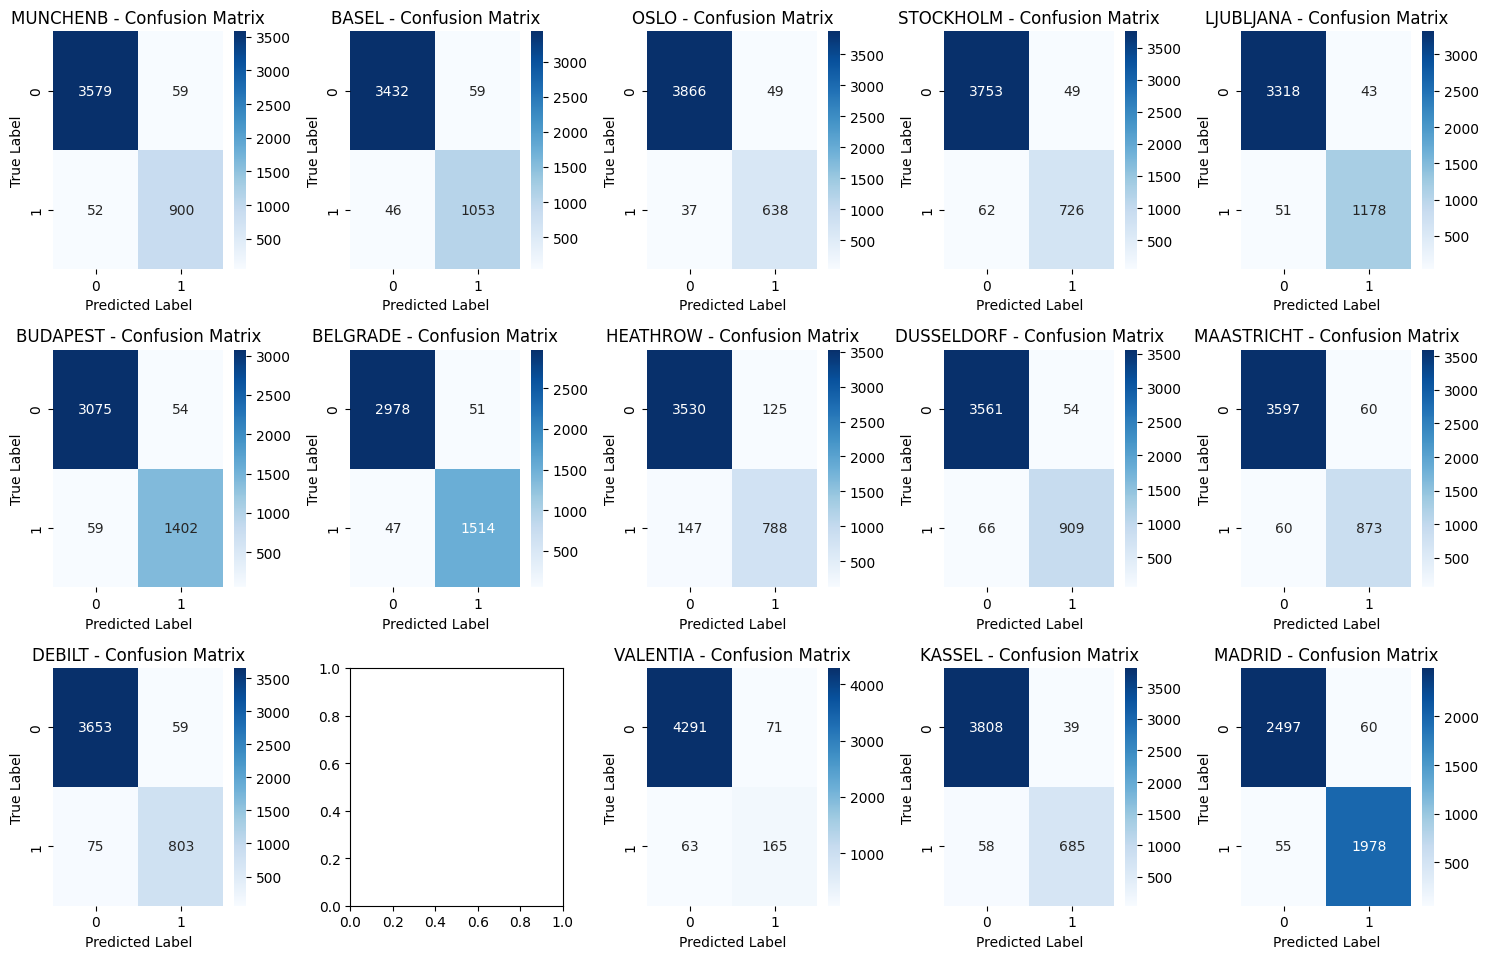

In [10]:
#Using unscaled data for creating DT model for each city

# Create subplots for all cities in a single figure
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Adjust the size as needed

# Variables to keep track of the best average accuracy and its corresponding city
best_average_accuracy = 0
best_city = None

for i, city in enumerate(cities):
    # Select columns from df_weather that contain the city
    X_columns = [col for col in df_weather.columns if city in col]
    X = df_weather[X_columns]

    # Select the corresponding column from df_answers
    y_column = f'{city}_pleasant_weather'
    y = df_answers[y_column]

    # Check if there are at least two unique values in the target variable
    if len(y.unique()) < 2:
        print(f'{city} - Insufficient classes in the target variable. Skipping...')
        continue

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Decision Tree model
    dt_model = DecisionTreeClassifier()

    # Train the model on the training set
    dt_model.fit(X_train, y_train)

    y_pred_test = dt_model.predict(X_test)

    accuracy_train = accuracy_score(dt_model.predict(X_train), y_train)
    accuracy_test = accuracy_score(y_pred_test, y_test)

    print(f'{city} - Training Accuracy: {accuracy_train:.2f}, Testing Accuracy: {accuracy_test:.2f}')

    # Confusion matrix for testing data
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Visualize the confusion matrix as a heatmap on the corresponding subplot
    row, col = divmod(i, 5)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"], ax=axes[row, col])
    axes[row, col].set_title(f'{city} - Confusion Matrix')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

    # Update best average accuracy and corresponding city
    if accuracy_test > best_average_accuracy:
        best_average_accuracy = accuracy_test
        best_city = city

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Print the best average accuracy and corresponding city
print(f'\nBest Testing Accuracy: {best_average_accuracy:.2f} for City: {best_city}')

# Show the figure with all confusion matrices
plt.show()
